# Detector de lenguaje de signos

En este notebook vamos a entrenar y luego utilizar el modelo entrenado para detectar lenguajes de signos con una camara utilizando mediapipe.

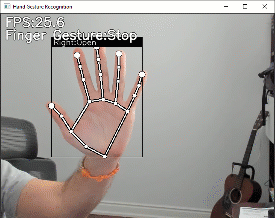


In [1]:
# Importaciones
import os
import cv2
import pandas as pd
import pickle 
import matplotlib as plt
import numpy as np
import mediapipe as mp
import seaborn as sns
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

# 1. Crear el dataset



In [3]:
# Crear el nombre de las columnas del Dataframe
coords = ["x", "y", "z"]
## Lista de nombres para las columnas
list_column_names = []
## WORD
list_column_names.append("Word")
## Mano derecha
count = 0
# Codigo para acceder a los landmarks
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        list_column_names.append("R"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
## Mano izquierda
count = 0
# Codigo para acceder a los landmarks
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        list_column_names.append("L"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
## POSICION
count = 0
# Codigo para acceder a los landmarks landmarks
for landmark in mp_holistic.PoseLandmark:
    for coord in coords:
        list_column_names.append(str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
    if count == 15:
        break

In [4]:
df = pd.DataFrame(columns = [list_column_names])
df

,Word,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z


In [5]:
# Leer Videos
path = "../Train_Dataset/"
words = [words for words in os.listdir(path) if os.path.isdir(os.path.join(path, words))]
# Todos los videos
HEIGHT = 600
WIDTH  = 900
for word in words:
    for video in os.listdir(os.path.join(path, word)):
        # Ruta para cada video
        video_path = os.path.join(os.path.join(path, word), video)
        print(video_path)
        # Captura de video con OpenCV
        cap = cv2.VideoCapture(video_path)
        # Iniciando el modelo Holistico de Mediapipe
        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            while cap.isOpened():
                # Leer frame
                ret, frame = cap.read()
                if ret == True:
                    # Ajustanto frame
                    #frame = cv2.resize(frame, (WIDTH, HEIGHT), interpolation = cv2.INTER_AREA)
                    # Cambiar color de BGR to RGB
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame.flags.writeable = False
                    # Detectar landmarks
                    results = holistic.process(frame)
                    try:
                        # Agregando coordenadas a la lista de filas
                        row = []
                        # El nombre de la palabra es agregada a las lista de filas.
                        row.append(word)
                        ## Obteniendo landmarks de la mano derecha
                        for landmark in results.right_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Obteniendo landmarks de la mano izquierda
                        for landmark in results.left_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Obteniendo pose landmarks
                        count = 0
                        for landmark in results.pose_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                            count += 1
                            if count == 15:
                                break
                        df.loc[len(df)] = row
                    except:
                        pass
                else:
                    break
            cap.release()

../Train_Dataset/Sentir/word-sentir-016.mp4


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


../Train_Dataset/Sentir/word-sentir-017.mp4
../Train_Dataset/Sentir/word-sentir-027.mp4
../Train_Dataset/Sentir/word-sentir-011.mp4
../Train_Dataset/Sentir/word-sentir-001.mp4
../Train_Dataset/Sentir/word-sentir-014.mp4
../Train_Dataset/Sentir/word-sentir-006.mp4
../Train_Dataset/Sentir/word-sentir-029.mp4
../Train_Dataset/Sentir/word-sentir-026.mp4
../Train_Dataset/Sentir/word-sentir-019.mp4
../Train_Dataset/Sentir/word-sentir-015.mp4
../Train_Dataset/Sentir/word-sentir-009.mp4
../Train_Dataset/Sentir/word-sentir-021.mp4
../Train_Dataset/Sentir/word-sentir-020.mp4
../Train_Dataset/Sentir/word-sentir-007.mp4
../Train_Dataset/Sentir/word-sentir-018.mp4
../Train_Dataset/Sentir/word-sentir-024.mp4
../Train_Dataset/Sentir/word-sentir-003.mp4
../Train_Dataset/Sentir/word-sentir-010.mp4
../Train_Dataset/Sentir/word-sentir-002.mp4
../Train_Dataset/Sentir/word-sentir-028.mp4
../Train_Dataset/Sentir/word-sentir-022.mp4
../Train_Dataset/Sentir/word-sentir-004.mp4
../Train_Dataset/Sentir/word-sen

[aac @ 0x5570b6d78fc0] Prediction is not allowed in AAC-LC.


../Train_Dataset/Cerveza/word-cerveza-032.mp4
../Train_Dataset/Amigo/word-amigo-001.mp4
../Train_Dataset/Amigo/word-amigo-002.mp4
../Train_Dataset/Amigo/word-amigo-004.mp4
../Train_Dataset/Amigo/word-amigo-003.mp4
../Train_Dataset/Casa/word-casa-023.mp4
../Train_Dataset/Casa/word-casa-030.mp4
../Train_Dataset/Casa/word-casa-049.mp4
../Train_Dataset/Casa/word-casa-076.mp4
../Train_Dataset/Casa/word-casa-041.mp4
../Train_Dataset/Casa/word-casa-058.mp4
../Train_Dataset/Casa/word-casa-013.mp4
../Train_Dataset/Casa/word-casa-054.mp4
../Train_Dataset/Casa/word-casa-082.mp4
../Train_Dataset/Casa/word-casa-007.mp4
../Train_Dataset/Casa/word-casa-010.mp4
../Train_Dataset/Casa/word-casa-006.mp4
../Train_Dataset/Casa/word-casa-048.mp4
../Train_Dataset/Casa/word-casa-022.mp4
../Train_Dataset/Casa/word-casa-059.mp4
../Train_Dataset/Casa/word-casa-039.mp4
../Train_Dataset/Casa/word-casa-077.mp4
../Train_Dataset/Casa/word-casa-080.mp4
../Train_Dataset/Casa/word-casa-017.mp4
../Train_Dataset/Casa/word

[aac @ 0x5570b686f980] Prediction is not allowed in AAC-LC.


../Train_Dataset/Casa/word-casa-052.mp4
../Train_Dataset/Casa/word-casa-066.mp4
../Train_Dataset/Casa/word-casa-063.mp4
../Train_Dataset/Casa/word-casa-008.mp4
../Train_Dataset/Casa/word-casa-042.mp4
../Train_Dataset/Casa/word-casa-035.mp4
../Train_Dataset/Casa/word-casa-037.mp4
../Train_Dataset/Casa/word-casa-071.mp4
../Train_Dataset/Casa/word-casa-027.mp4
../Train_Dataset/Casa/word-casa-068.mp4
../Train_Dataset/Casa/word-casa-021.mp4
../Train_Dataset/Casa/word-casa-051.mp4
../Train_Dataset/Casa/word-casa-033.mp4
../Train_Dataset/Casa/word-casa-043.mp4


[aac @ 0x5570b67658c0] channel element 2.10 is not allocated


../Train_Dataset/Casa/word-casa-074.mp4
../Train_Dataset/Casa/word-casa-019.mp4
../Train_Dataset/Casa/word-casa-014.mp4
../Train_Dataset/Casa/word-casa-018.mp4
../Train_Dataset/Casa/word-casa-036.mp4
../Train_Dataset/Casa/word-casa-044.mp4
../Train_Dataset/Casa/word-casa-056.mp4
../Train_Dataset/Casa/word-casa-029.mp4
../Train_Dataset/Casa/word-casa-012.mp4
../Train_Dataset/Casa/word-casa-025.mp4
../Train_Dataset/Casa/word-casa-024.mp4
../Train_Dataset/Casa/word-casa-083.mp4
../Train_Dataset/Casa/word-casa-078.mp4
../Train_Dataset/Casa/word-casa-053.mp4
../Train_Dataset/Casa/word-casa-075.mp4
../Train_Dataset/Casa/word-casa-016.mp4
../Train_Dataset/Casa/word-casa-057.mp4
../Train_Dataset/Casa/word-casa-005.mp4
../Train_Dataset/Casa/word-casa-081.mp4
../Train_Dataset/Casa/word-casa-020.mp4
../Train_Dataset/Casa/word-casa-032.mp4
../Train_Dataset/Casa/word-casa-055.mp4
../Train_Dataset/Casa/word-casa-011.mp4
../Train_Dataset/Casa/word-casa-061.mp4
../Train_Dataset/Abajo/word-abajo-002.mp

### Guardando dataset en formato csv

In [6]:
df.to_csv("data.csv", index= False)

# MACHINE LEARNING

# Entrenamiento

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df

,Word,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z
0,Sentir,0.386144,0.459848,-1.179804e-08,0.408331,0.479852,-0.009072,0.430102,0.480624,-0.016187,...,-0.299069,0.360309,0.400325,-0.150785,0.621603,0.673018,-0.390180,0.250601,0.431910,-0.442944
1,Sentir,0.336255,0.453641,-9.424542e-08,0.353902,0.470233,-0.006289,0.366266,0.477797,-0.013941,...,-0.233202,0.343740,0.413309,-0.157509,0.613596,0.671482,-0.172896,0.221676,0.446922,-0.516760
2,Sentir,0.333110,0.462354,-1.266709e-07,0.357921,0.484441,-0.000097,0.374394,0.493116,-0.003101,...,-0.240588,0.340921,0.413263,-0.203293,0.610817,0.671373,-0.195682,0.220415,0.446405,-0.546887
3,Sentir,0.344300,0.465075,-1.303941e-07,0.367883,0.485021,-0.004310,0.385779,0.489929,-0.011813,...,-0.178911,0.339422,0.413152,-0.176888,0.608277,0.671215,-0.148446,0.216819,0.446258,-0.521978
4,Sentir,0.491406,0.588527,1.475378e-07,0.543438,0.624702,-0.002366,0.589769,0.642802,-0.018388,...,-0.022784,0.411898,0.533255,-0.345996,0.917344,0.945876,-0.145358,0.182261,0.777038,-1.161865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,Colegio,0.405718,0.401357,1.146171e-07,0.372858,0.356440,-0.001563,0.358995,0.303253,-0.002456,...,0.008766,0.434398,0.523676,-0.010042,0.986913,0.841947,-0.441968,0.304296,0.697772,-0.748336
1437,Colegio,0.438336,0.398062,1.571610e-07,0.411972,0.354438,-0.002057,0.400077,0.300740,-0.003575,...,-0.018882,0.438120,0.523995,0.038137,0.987997,0.836366,-0.439440,0.307255,0.699487,-0.645508
1438,Colegio,0.470176,0.413677,1.667391e-08,0.451807,0.370361,0.001512,0.447420,0.317116,0.004072,...,-0.055087,0.438636,0.526800,0.039612,0.988003,0.832100,-0.472607,0.307532,0.699958,-0.647440
1439,Colegio,0.496517,0.441799,2.219592e-07,0.482174,0.393883,-0.005018,0.482767,0.348866,-0.010930,...,-0.080731,0.438677,0.526359,0.127886,0.989282,0.830552,-0.438887,0.307501,0.707356,-0.488547


In [9]:
df.tail()

,Word,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z
1436,Colegio,0.405718,0.401357,1.146171e-07,0.372858,0.356440,-0.001563,0.358995,0.303253,-0.002456,...,0.008766,0.434398,0.523676,-0.010042,0.986913,0.841947,-0.441968,0.304296,0.697772,-0.748336
1437,Colegio,0.438336,0.398062,1.571610e-07,0.411972,0.354438,-0.002057,0.400077,0.300740,-0.003575,...,-0.018882,0.438120,0.523995,0.038137,0.987997,0.836366,-0.439440,0.307255,0.699487,-0.645508
1438,Colegio,0.470176,0.413677,1.667391e-08,0.451807,0.370361,0.001512,0.447420,0.317116,0.004072,...,-0.055087,0.438636,0.526800,0.039612,0.988003,0.832100,-0.472607,0.307532,0.699958,-0.647440
1439,Colegio,0.496517,0.441799,2.219592e-07,0.482174,0.393883,-0.005018,0.482767,0.348866,-0.010930,...,-0.080731,0.438677,0.526359,0.127886,0.989282,0.830552,-0.438887,0.307501,0.707356,-0.488547
1440,Colegio,0.495653,0.442678,2.198008e-07,0.472829,0.400512,-0.006831,0.470714,0.356234,-0.014479,...,-0.063197,0.437577,0.528612,0.115972,0.989373,0.830720,-0.411149,0.309702,0.722309,-0.506607


In [10]:
df.isnull().sum()

Word                             0
RHandLandmark.WRIST_0_x          0
RHandLandmark.WRIST_0_y          0
RHandLandmark.WRIST_0_z          0
RHandLandmark.THUMB_CMC_1_x      0
                                ..
PoseLandmark.LEFT_ELBOW_13_y     0
PoseLandmark.LEFT_ELBOW_13_z     0
PoseLandmark.RIGHT_ELBOW_14_x    0
PoseLandmark.RIGHT_ELBOW_14_y    0
PoseLandmark.RIGHT_ELBOW_14_z    0
Length: 172, dtype: int64

In [11]:
X = df.drop('Word', axis=1) # features
y = df['Word'] # target value

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [13]:
y_test

1339    Colegio
418     Cerveza
1202       Casa
1292       Casa
1006       Casa
         ...   
367     Cerveza
971        Casa
718        Casa
260     Cerveza
477     Cerveza
Name: Word, Length: 433, dtype: object

In [14]:
pipelines = {
#  'lr':make_pipeline(MinMaxScaler(), LogisticRegression()),
#    'rc':make_pipeline(MinMaxScaler(), RidgeClassifier()),
    #'rf':make_pipeline(MinMaxScaler(), RandomForestClassifier()),
#     'gb':make_pipeline(MinMaxScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(MinMaxScaler(),SVC(probability=True))
}

In [15]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model
    

    

In [16]:
fit_models

{'sv': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC(probability=True))])}

In [17]:
fit_models['sv'].predict(X_test)


array(['Colegio', 'Cerveza', 'Casa', 'Casa', 'Casa', 'Cerveza', 'Casa',
       'Cerveza', 'Cerveza', 'Cerveza', 'Cerveza', 'Sentir', 'Casa',
       'Casa', 'Cerveza', 'Casa', 'Casa', 'Casa', 'Casa', 'Colegio',
       'Casa', 'Cerveza', 'Casa', 'Casa', 'Cerveza', 'Casa', 'Casa',
       'Cerveza', 'Casa', 'Amigo', 'Cerveza', 'Colegio', 'Casa', 'Casa',
       'Casa', 'Colegio', 'Cerveza', 'Casa', 'Casa', 'Cerveza', 'Casa',
       'Casa', 'Casa', 'Casa', 'Casa', 'Casa', 'Colegio', 'Casa',
       'Cerveza', 'Casa', 'Casa', 'Colegio', 'Cerveza', 'Cerveza',
       'Sentir', 'Colegio', 'Colegio', 'Amigo', 'Cerveza', 'Casa',
       'Colegio', 'Casa', 'Cerveza', 'Cerveza', 'Casa', 'Cerveza',
       'Colegio', 'Casa', 'Casa', 'Cerveza', 'Cerveza', 'Cerveza',
       'Cerveza', 'Cerveza', 'Sentir', 'Amigo', 'Cerveza', 'Colegio',
       'Casa', 'Amigo', 'Casa', 'Casa', 'Sentir', 'Amigo', 'Casa', 'Casa',
       'Casa', 'Cerveza', 'Casa', 'Cerveza', 'Casa', 'Cerveza', 'Casa',
       'Casa', 'Casa', 'C

In [18]:
for algo, model in fit_models.items():
    y_pred= model.predict(X_test)
    print(algo, accuracy_score(y_test, y_pred))

sv 0.9930715935334873


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


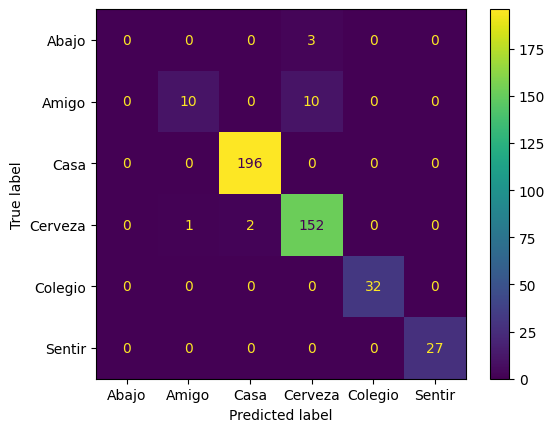

In [19]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  


In [20]:

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and  len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in 
                                cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in 
                   zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1,Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
# Mostrar Confusion Matrix con métricas adicionales

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Abajo', 'Amigo','Casa','Cerveza','Colegio','Sentir']
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, 
                        cmap='binary')



TypeError: 'module' object is not callable

In [21]:
fit_models['sv'].predict(X_test)

array(['Colegio', 'Cerveza', 'Casa', 'Casa', 'Casa', 'Cerveza', 'Casa',
       'Cerveza', 'Cerveza', 'Cerveza', 'Cerveza', 'Sentir', 'Casa',
       'Casa', 'Cerveza', 'Casa', 'Casa', 'Casa', 'Casa', 'Colegio',
       'Casa', 'Cerveza', 'Casa', 'Casa', 'Cerveza', 'Casa', 'Casa',
       'Cerveza', 'Casa', 'Amigo', 'Cerveza', 'Colegio', 'Casa', 'Casa',
       'Casa', 'Colegio', 'Cerveza', 'Casa', 'Casa', 'Cerveza', 'Casa',
       'Casa', 'Casa', 'Casa', 'Casa', 'Casa', 'Colegio', 'Casa',
       'Cerveza', 'Casa', 'Casa', 'Colegio', 'Cerveza', 'Cerveza',
       'Sentir', 'Colegio', 'Colegio', 'Amigo', 'Cerveza', 'Casa',
       'Colegio', 'Casa', 'Cerveza', 'Cerveza', 'Casa', 'Cerveza',
       'Colegio', 'Casa', 'Casa', 'Cerveza', 'Cerveza', 'Cerveza',
       'Cerveza', 'Cerveza', 'Sentir', 'Amigo', 'Cerveza', 'Colegio',
       'Casa', 'Amigo', 'Casa', 'Casa', 'Sentir', 'Amigo', 'Casa', 'Casa',
       'Casa', 'Cerveza', 'Casa', 'Cerveza', 'Casa', 'Cerveza', 'Casa',
       'Casa', 'Casa', 'C

In [22]:
y_test

1339    Colegio
418     Cerveza
1202       Casa
1292       Casa
1006       Casa
         ...   
367     Cerveza
971        Casa
718        Casa
260     Cerveza
477     Cerveza
Name: Word, Length: 433, dtype: object

In [23]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['sv'], f)

In [24]:
# Load model
with open('./body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [25]:
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(probability=True))])

In [ ]:
cap = cv2.VideoCapture(0)
# Iniciando el modelo Holistico de Mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        # Leyendo frame
        ret, frame = cap.read()
        if ret == True:
            # Cambiando tamano de frame
            #frame = cv2.resize(frame, (WIDTH, HEIGHT), interpolation = cv2.INTER_AREA)
            # Cambiando color de BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame.flags.writeable = False
            # Detectando landmarks
            results = holistic.process(frame)
            
             # Mano izquierda (rojo)
            mp_drawing.draw_landmarks(
                frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2))

           # Mano derecha (verde)
            mp_drawing.draw_landmarks(
                frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(57, 143, 0), thickness=2))

           # Postura
            mp_drawing.draw_landmarks(
                frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(128, 0, 255), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))
            
            try:
                
                # Agregando coordenadas a la lista de filas
                row = []
                # El nombre de la palabra es agregada a la lista de filas.
              
                ## Obteniendo landmarks de la mano derecha
                try:
                    for landmark in results.right_hand_landmarks.landmark:
                        row.append(landmark.x)
                        row.append(landmark.y)
                        row.append(landmark.z)
                except:
                    pass
                ## Obtener landmarks de la mano izquierda
                try:
                    for landmark in results.left_hand_landmarks.landmark:
                        row.append(landmark.x)
                        row.append(landmark.y)
                        row.append(landmark.z)
                except:
                    pass
                    
                ## Obtener landmarks de postura
                
                try:
                    count = 0
                    for landmark in results.pose_landmarks.landmark:
                        row.append(landmark.x)
                        row.append(landmark.y)
                        row.append(landmark.z)
                        count += 1
                        if count == 15:
                            break
                except:
                    pass

            except:
                pass
                        
           
            if len(row)==171:
                       
            
                X = pd.DataFrame([row])
            
                body_language_class = model.predict(X)[0]
                body_language_prob = model.predict_proba(X)[0]
                print(body_language_class)

                # Ref ear coords
            #puntos de referencia desde donde coger las coordenadas para poner el rectangulo del cartelito(aqui las orejas) 
                coords = tuple(np.multiply(
                                np.array(
                                    (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                     results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                            , [640,480]).astype(int))
            #RECTANGULO AL LADO OREJA
                cv2.rectangle(frame, 
                              (coords[0], coords[1]+5), 
                              (coords[0]+len(body_language_class)*20, coords[1]-30), 
                              (0, 255, 0), -1)
            
            #TEXTO DENTRO RECTANGULO AL LADO OREJA
                cv2.putText(frame, body_language_class, coords,
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            
            # RECTAGULO SUPERIOR IZQUIERDA
                cv2.rectangle(frame, (0,0), (250, 60), (245, 117, 16),2)
            
            # Mostrando clase
                cv2.putText(frame, 'CLASS'  # texto enunciado
                            , (110,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(frame, body_language_class.split(' ')[0]   #texto valor class
                            , (110,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            
#             # Mostrando probabilidad
                cv2.putText(frame, 'PROB'
                            , (15,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(frame, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                            , (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
   
          
           
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            cv2.imshow("Imagen a detectar", frame)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
        else:
            break
cap.release()
cv2.destroyAllWindows()

   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.
QObject::moveToThread: Current thread (0x5570b6655080) is not the object's thread (0x5570b67b8c80).
Cannot move to target thread (0x5570b6655080)

QObject::moveToThread: Current thread (0x5570b6655080) is not the object's thread (0x5570b67b8c80).
Cannot move to target thread (0x5570b6655080)

QObject::moveToThread: Current thread (0x5570b6655080) is not the object's thread (0x5570b67b8c80).
Cannot move to target thread (0x5570b6655080)

QObject::moveToThread: Current thread (0x5570b6655080) is not the object's thread (0x5570b67b8c80).
Cannot move to target thread (0x5570b6655080)

QObject::moveToThread: Current thread (0x5570b6655080) is not the object's thread (0x5570b67b8c80).
Cannot move to target thread (0x5570b6655080)

QObject::moveToThread: Current thread (0x5570b6655080) is not th

/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo
Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Sentir
Amigo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Amigo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Sentir
Amigo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Amigo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Colegio
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Casa
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Abajo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Casa
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Casa
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Abajo
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Abajo
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Abajo
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Abajo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Abajo
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Abajo
Abajo
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Abajo
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio
Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Casa
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Colegio
Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Colegio
Colegio


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa
Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Cerveza
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Amigo
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Cerveza
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Sentir
Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Amigo
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Casa
Casa
Cerveza


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Sentir


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site

Casa
Amigo
Amigo


/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/hbars/Documents/UNMSM/Miriam/SaturdaysAI-sign-language/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Amigo
Cerveza
